In [1]:
#import required packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import missingno as msno
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [23]:
#import the training data sets

training_x = pd.read_csv("C:/Users/renee/Desktop/DSBA/Fall 2018/Group Project/Data/TrainingData.csv", index_col="id")
training_y = pd.read_csv("C:/Users/renee/Desktop/DSBA/Fall 2018/Group Project/Data/TrainingLabels.csv", index_col="id")

In [3]:
print(training_x.head(5))
print(training_x.shape)
print(training_x.columns)

       amount_tsh date_recorded        funder  gps_height     installer  \
id                                                                        
69572      6000.0    2011-03-14         Roman        1390         Roman   
8776          0.0    2013-03-06       Grumeti        1399       GRUMETI   
34310        25.0    2013-02-25  Lottery Club         686  World vision   
67743         0.0    2013-01-28        Unicef         263        UNICEF   
19728         0.0    2011-07-13   Action In A           0       Artisan   

       longitude   latitude              wpt_name  num_private  \
id                                                               
69572  34.938093  -9.856322                  none            0   
8776   34.698766  -2.147466              Zahanati            0   
34310  37.460664  -3.821329           Kwa Mahundi            0   
67743  38.486161 -11.155298  Zahanati Ya Nanyumbu            0   
19728  31.130847  -1.825359               Shuleni            0   

           

In [4]:
print(training_x.dtypes)

amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_type              object
water_qual

In [5]:
print(training_y.head(5))
print(training_y.shape)

         status_group
id                   
69572      functional
8776       functional
34310      functional
67743  non functional
19728      functional
(59400, 1)


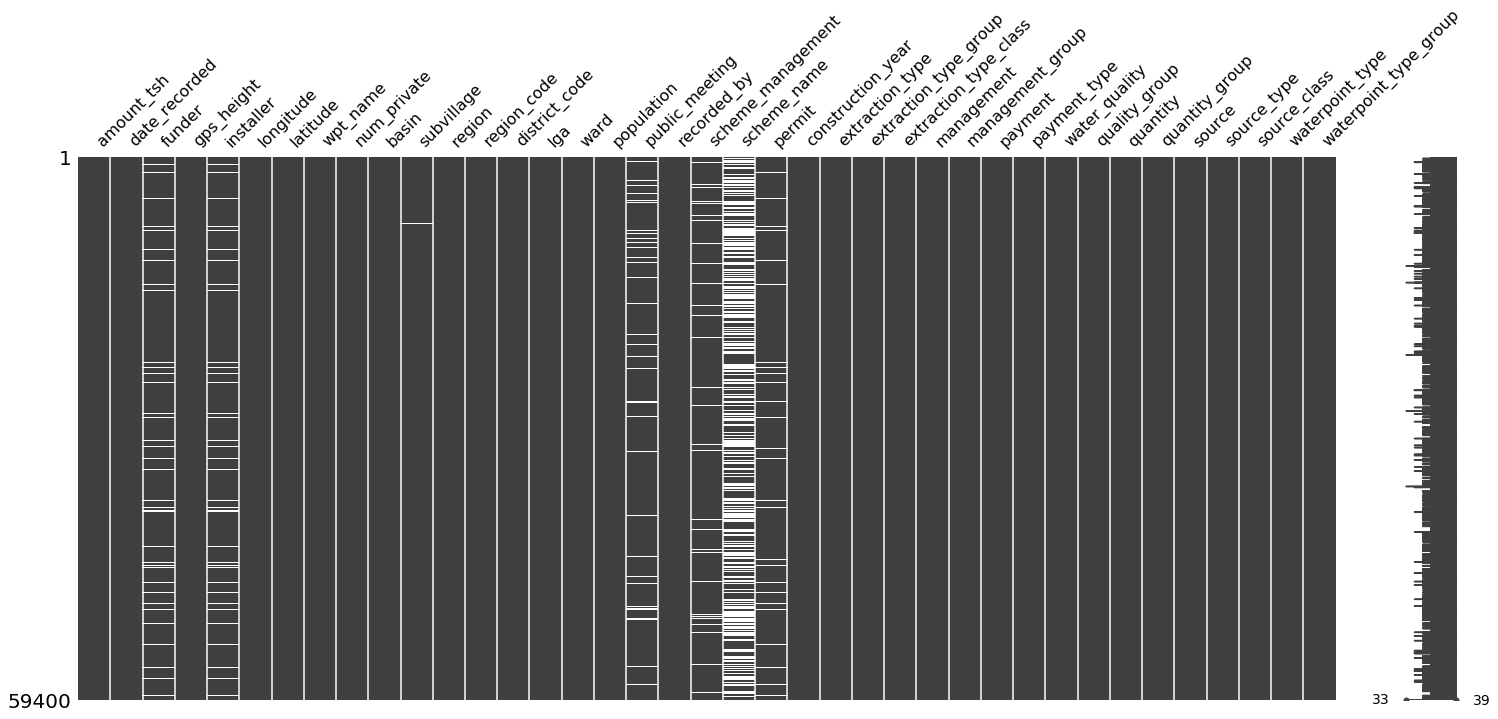

In [6]:
# display a plot of the missing values. White spaces indicate a null/missing value
msno.matrix(training_x)

In [7]:
# review distribution of the numerica variables 
training_x.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [8]:
print(training_x.dtypes)

amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_type              object
water_qual

In [24]:
#convert the data types of fields as needed
training_x.loc[:,['date_recorded']] = training_x[['date_recorded']].apply(pd.to_datetime, format='%Y-%m-%d')
#training_x.loc[:,['public_meeting', 'permit']].astype('bool')

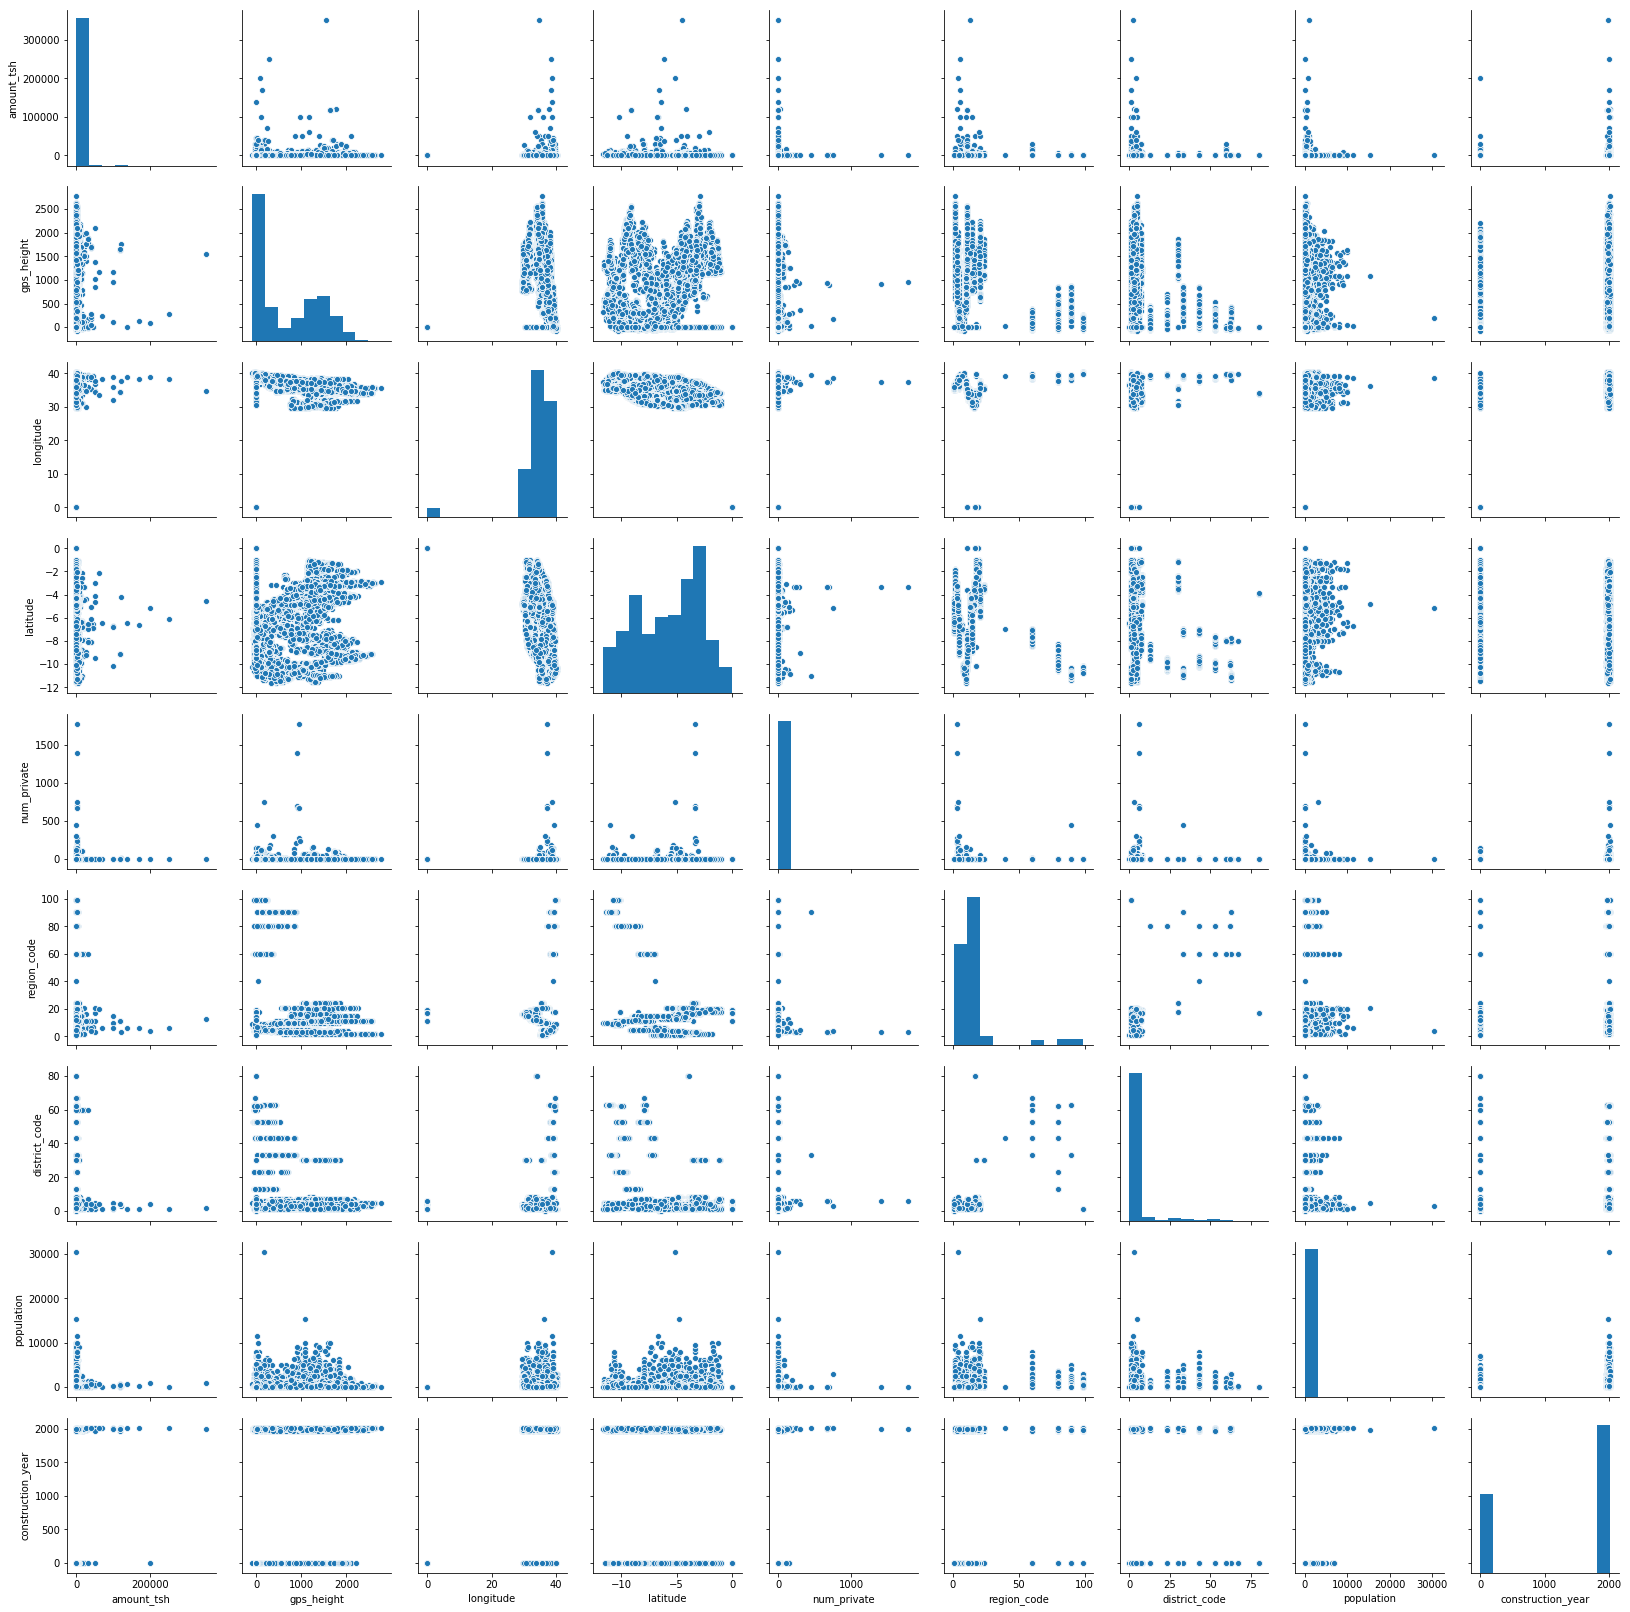

In [19]:
#plot the pairwise variables to view possile collinearity
df_numeric = training_x.select_dtypes(exclude=['object'])
plot = sns.pairplot(df_numeric)

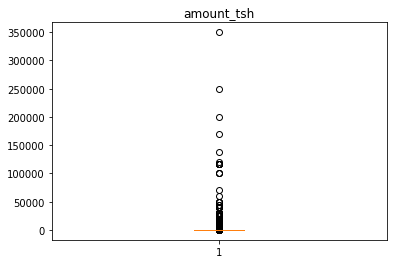

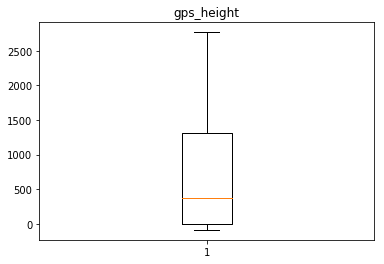

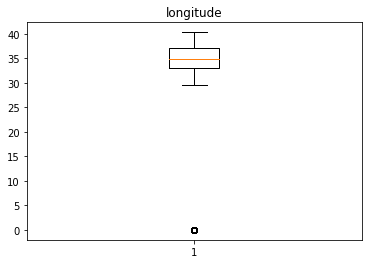

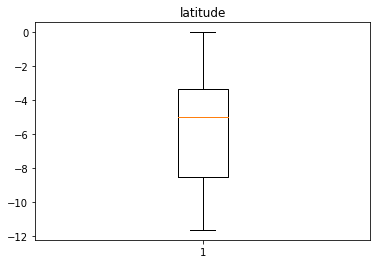

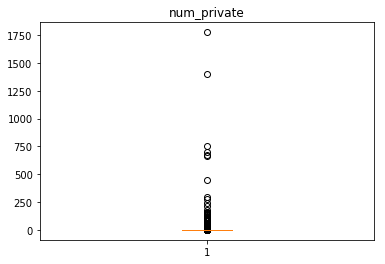

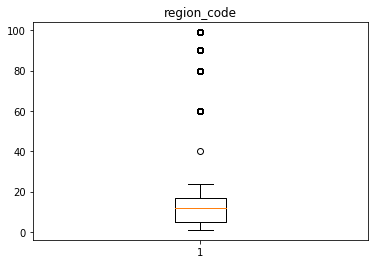

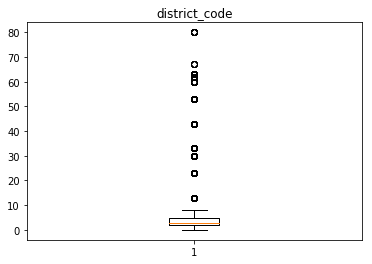

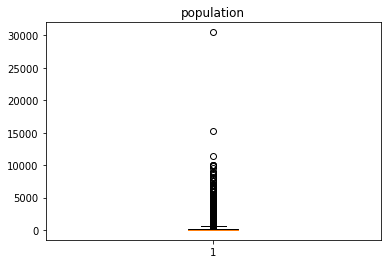

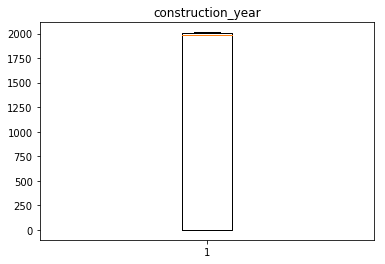

In [11]:
#boxplots show a very uneven distribution of variables 

obj_num = training_x.select_dtypes(include=['int64', 'float64'])

def make_boxplot(df): 
    for index in df:
        plt.title(index)
        plt.boxplot(df[index])
        plt.show()
        
make_boxplot(obj_num)

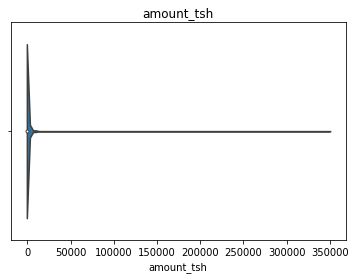

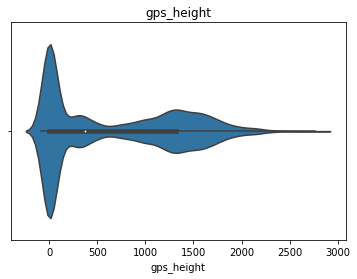

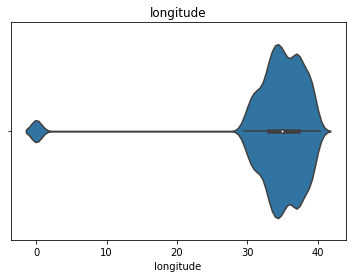

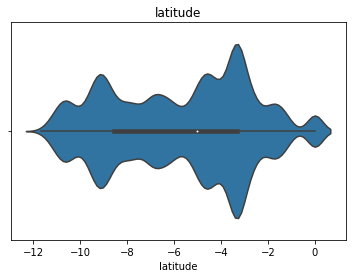

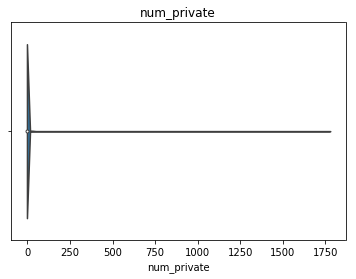

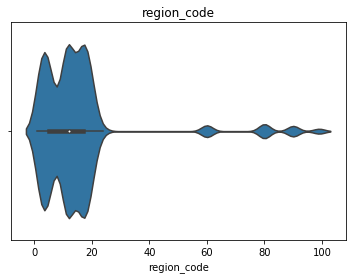

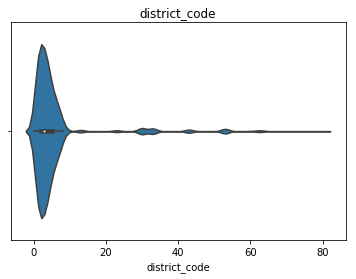

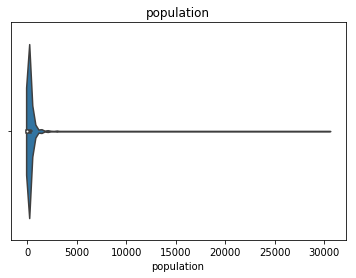

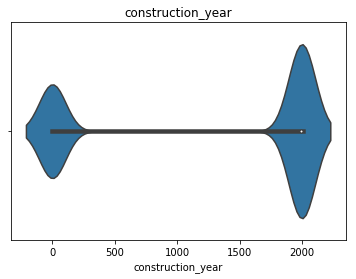

In [12]:
def make_violinplot(df): 
    for index in df:
        plt.title(index)
        sns.violinplot(df[index])
        plt.show()
        
make_violinplot(obj_num)

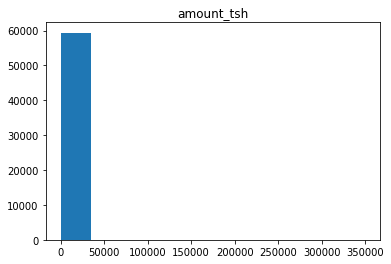

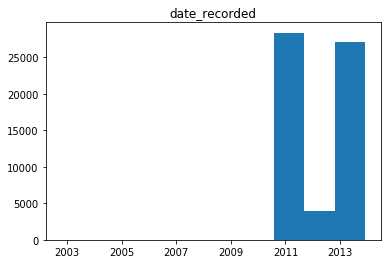

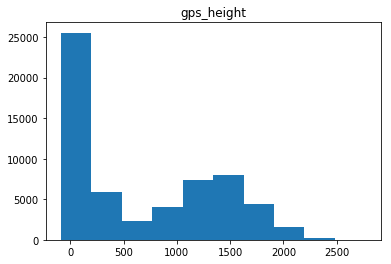

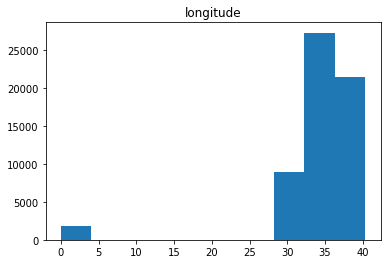

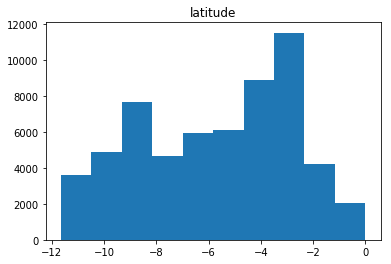

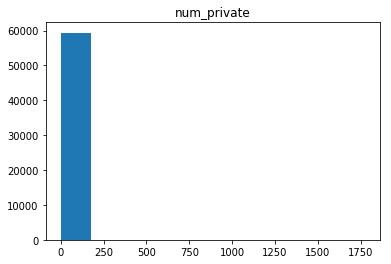

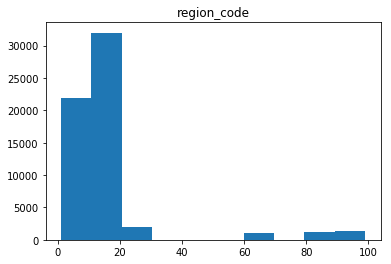

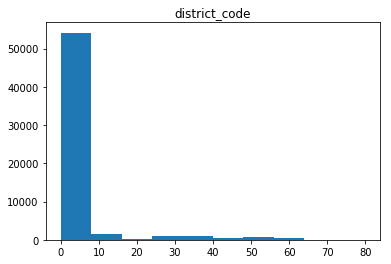

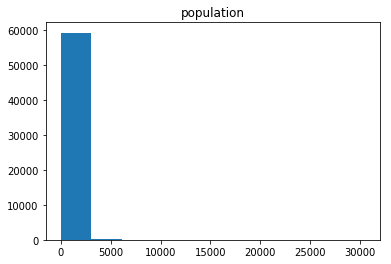

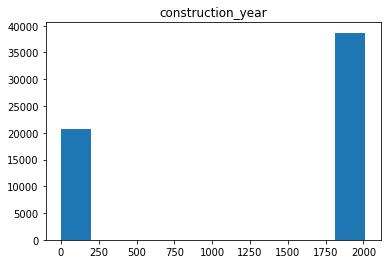

In [13]:
# https://github.com/mwaskom/seaborn/issues/1325
#from pandas.tseries import converter
#converter.register()

def make_density_plot(df): 
    for index in df:
        #if type(index) != pd.datetime64:
            plot = sns.distplot(index, norm_hist=True)
            
            
def make_hist(df): 
    for column in df:
        #if type(index) != pd.datetime64:
        plt.title(column) 
        plt.hist(df[column])
        plt.show()
        
make_hist(df_numeric)

In [25]:
# dummy encoding- would prefer not to do this and use labelencoder instead because it creates a sparse matrix 
# since some variables have so many values
obj_df = training_x.select_dtypes(include=[object])
#print(obj_df.columns)

obj_df[pd.isnull(obj_df)]  = 'NaN'
obj_df.drop(['public_meeting', 'permit'], axis=1, inplace=True)


(obj_df.to_csv('C:/Users/renee/Desktop/DSBA/Fall 2018/Group Project/Code/funder.csv'))




encoded_df = pd.DataFrame(obj_df.apply(LabelEncoder().fit_transform))
#dummies = pd.get_dummies(training_x, prefix=obj_names)
#print(encoded_df)
print(training_x.shape)
print(encoded_df.shape)
training_x.drop(obj_df.columns, axis=1, inplace=True)
print(training_x.shape)
training_x = training_x.join(encoded_df, how='left')
print(training_x.shape)
#print(training_x)

C:\Users\renee\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\renee\Anaconda3\lib\site-packages\pandas\core\frame.py:2554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
C:\Users\renee\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


(59400, 39)
(59400, 27)
(59400, 12)
(59400, 39)


In [26]:
#the "fd" option for binning sounds like it might help distribute bins more evenly for some variables, 
#but it takes too long to run and keeps locking up the kernel 

#plt.hist(training_x['amount_tsh'], bins='fd')4


(59400, 39)


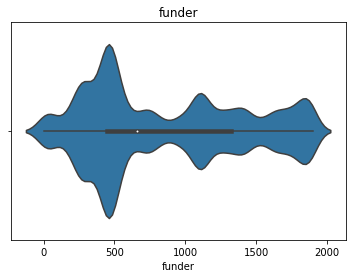

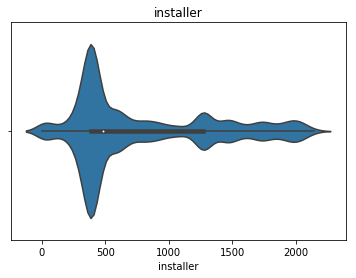

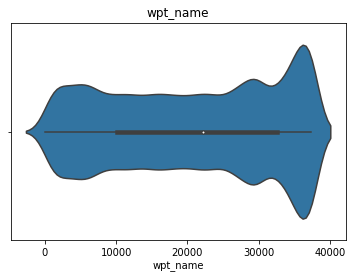

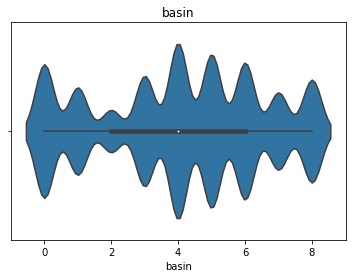

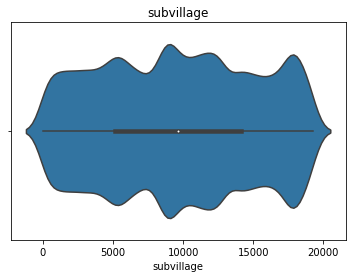

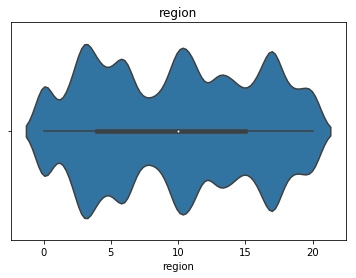

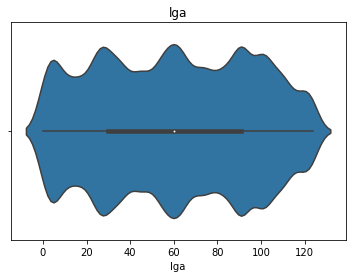

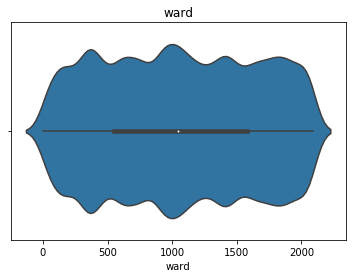

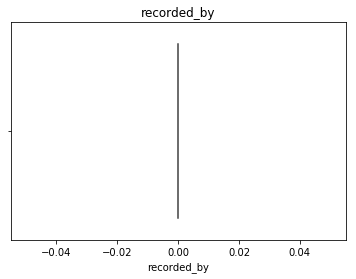

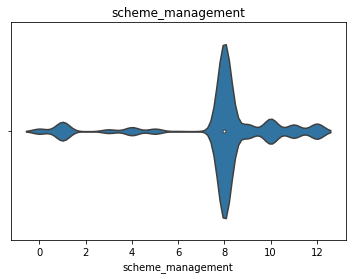

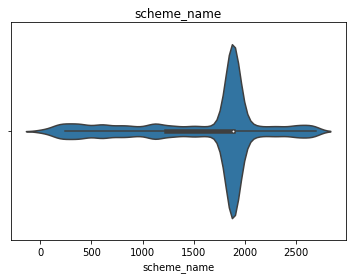

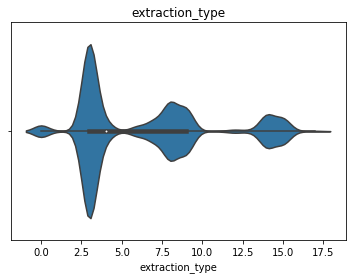

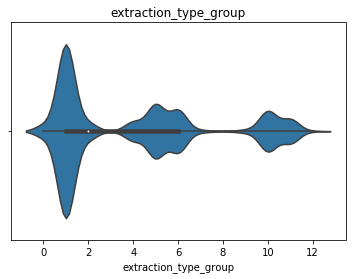

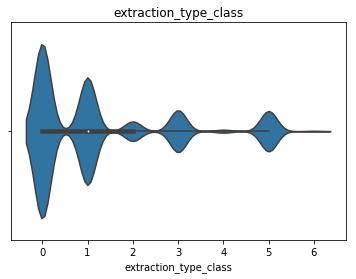

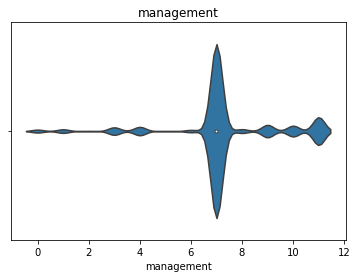

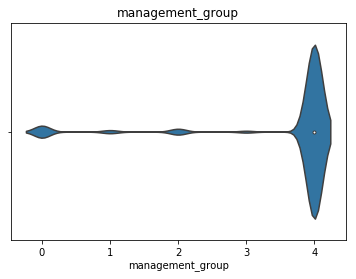

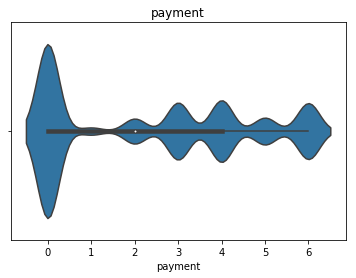

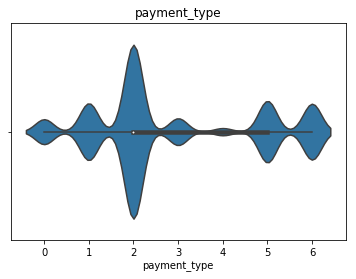

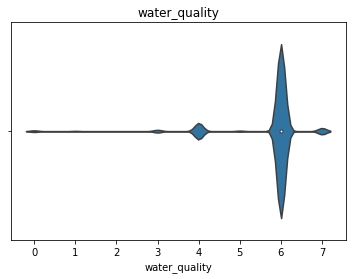

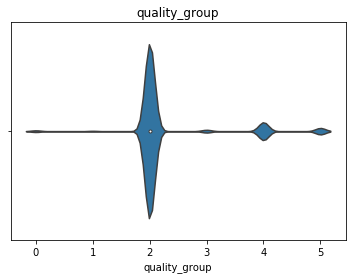

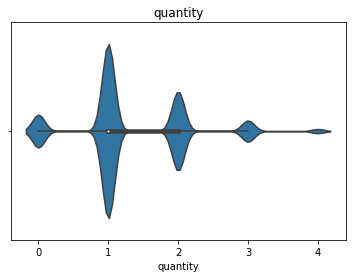

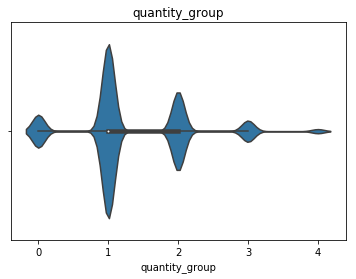

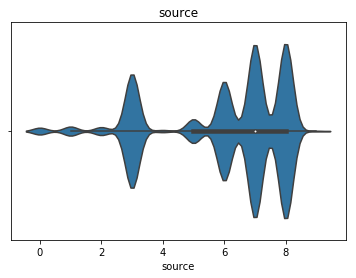

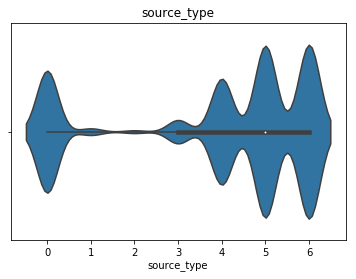

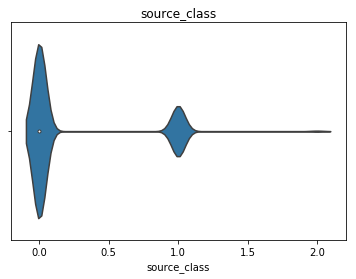

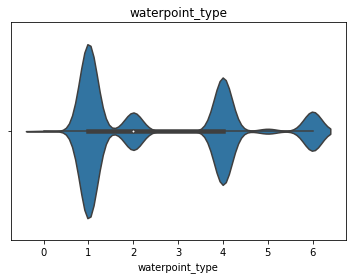

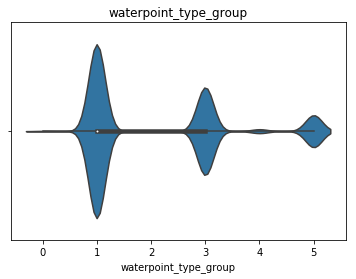

In [27]:
make_violinplot(encoded_df)

In [ ]:

obj_num = training_x.select_dtypes(include=['int64', 'float64'])
corrcoef = np.corrcoef(obj_num)
print(corrcoef)